# **Lab 1: Intro to Coding and Simulation**

# General instructions (how to turn in, etc)


In [ ]:
#student name, collaborators, etc

#Basic Running of Code #

For this class you will be working with the popular coding language Python entirley within jupyter notebooks on Colab. To run code in Colab, you can press shift+enter or the plus sign.

<font color='green'><u><b> Exercise 1.</b></u> </font> Below is a code block, try running it!

In [ ]:
print("hello world")

You can add a cell by clicking in between two existing cells or by pressing the plus sign in the toolbar. A cell is also automatically added if you run the last cell in a worksheet.

<font color='green'><u><b> Exercise 2.</b></u> </font>Try adding a cell below the existing cell here.

In [ ]:
#add a cell below this cell

You can delete extra cells by pressing edit then delete, or by right clicking cell you want to delete, and clicking the trash can icon that shows up in the top right.

<font color='green'><u><b> Exercise 3.</b></u> </font>Try it out on the duplicate cell below!

In [ ]:
#delete this cell

 In Python, as in most computer languages, code is evaluated line by line, from top to bottom, and in jupyter cells run one at a time.

 <font color='green'><u><b> Exercise 4.</b></u> </font> Try running the cell below and explain what happens! You can write comments in the code using the # symbol, anything after a # is not read by the computer.

In [ ]:
a=12
print(a+b)
b=3

#write your commments after this, explaining what happens

#Shark-Tuna, with Perturbation and Comparison#

Below there is some code that generates time-series for the Shark-Tuna model you saw in Lecture 1A. These simulations can all be generated in Python! Run the code below to view the time-series.

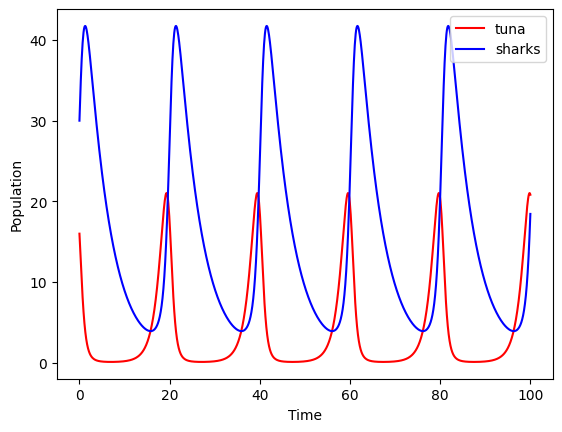

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

#set up the change equations (aka differential equations or ODEs) for the model
def odes(state_values, t):
  tuna,shark=state_values
  br=0.8
  dr=0.2
  beta=0.05
  tprime= br*tuna-beta*shark*tuna
  sprime= beta*shark*tuna - dr*shark
  return [tprime, sprime]

t=np.linspace(0,100,1000) #this sets up the time values for the simulation
sv = [16,30] #initial values of tuna and shark as [T,S]
sol=odeint(odes,sv,t) #simulates the model

#plot simulation
plt.plot(t,sol[:,0],label="tuna",color="red") #plot the tuna
plt.plot(t,sol[:,1],label="sharks",color="blue") #plot the sharks
plt.legend(loc='best') #prepare the legend
plt.xlabel('Time') #set an x label
plt.ylabel('Population') #set a y label
plt.show() #show the plot


<font color='green'><u><b> Exercise 5.</b></u> </font>
Now that you've run the time series, what do you see? Describe the output based on the prompts below.

1. Where are the peaks? Do the peaks occur at the same time or at different times?
2. Do the curves go up and down at the same time?
3. Qualitatively describe what is happening with these populations. For instance, when the shark population is low and the tuna population is low, what happens next, and why? What happens after that, and why?

In [ ]:
#describe what you see (using the prompts above)

One of the most important things that determines how a biological model behaves is where it *starts*. In modeling, we call the starting values of the variables the "initial condition." In the case of the shark-tuna model we have been working with, this is just the amount of sharks and tuna that we start with when we begin the simulation at time $t=0$.

<font color='green'><u><b> Exercise 6.</b></u> </font> Now we are going to explore how changing those initial conditions influences the behavior of the model. To do so, first copy the code above that produced the time series graph you were just describing. Next, in that code, you should find a line that defines the initial conditions. Change the value of the sharks and tuna, and run the code again.

In [ ]:
#initial condition set 1

<font color='green'><u><b> Exercise 7.</b></u> </font> Now, do exactly the same thing, but use a different set of initial conditions:

In [ ]:
#initial condition set 2

<font color='green'><u><b> Exercise 8.</b></u> </font> Briefly describe your results. How did changing the initial conditions change the behavior of the model?

In [ ]:
#describe your findings here

Simulations can be a great way to visualize what the effect of an intervention may be.
Run the code to see the results when you remove 30 sharks at t = 40. Don't worry about the implementation of this code at this stage, we just want you to be able to interpret the results!

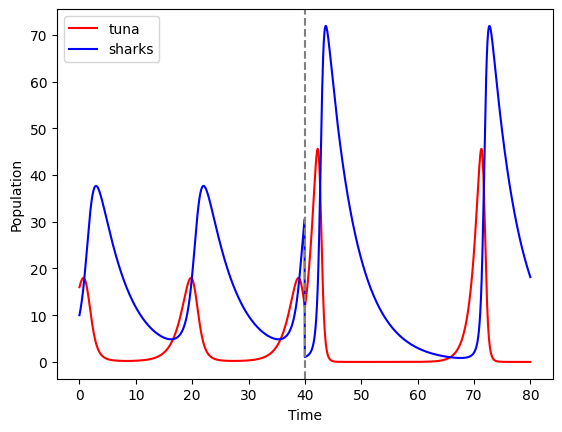

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

shark_removal = 30 #how many sharks are removed (cannot be greater than the number of sharks that exist!)
removal_time =40 #when the sharks are removed
#set up the ODES for the model
def odes(state_values, t):
  tuna, shark=state_values
  br=0.8
  dr=0.2
  beta=0.05
  tprime= br*tuna-beta*shark*tuna
  sprime= beta*shark*tuna - dr*shark
  return [tprime, sprime]


t=np.linspace(0,removal_time,1000) #this sets up the time values for the simulation
sv = [16,10] #initial values for shark and tuna
sol2=odeint(odes, sv, t) #simulates the model
sv2=sol2[-1,:] #pulls the last timepoint from the first simuation
sv2[1]=sv2[1]-shark_removal #does the shark removal
sol2b=odeint(odes,sv2,t)
sol_2b=np.concatenate((sol2,sol2b),axis=0)
t2=np.linspace(0,removal_time*2,2000)

#plot simulation
plt.plot(t2,sol_2b[:,0],label="tuna",color="red") #plot the tuna
plt.plot(t2,sol_2b[:,1],label="sharks",color="blue") #plot the sharks
plt.axvline(x=removal_time,color="gray",linestyle="--")
plt.legend(loc='best') #prepare the legend
plt.xlabel('Time') #set an x label
plt.ylabel('Population') #set a y label
plt.show() #show the plot


<font color='green'><u><b> Exercise 9.</b></u> </font> Describe what changes occur. What about this change is unexpected?

In [ ]:
#Describe the changes here

Try making a change of your own, by either modifying the time that sharks are removed, or the number of sharks removed. In the code below, there are two variables you need to worry about:

```
shark_removal = 30
removal_time = 40
```

<font color='green'><u><b> Exercise 10.</b></u> </font> Change one of these values, and describe your results.

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

#make a change to either of these values HERE
shark_removal = 30
removal_time = 40

#set up the ODES for the model
def odes(state_values, t):
  tuna,shark=state_values
  br=0.8
  dr=0.2
  beta=0.05
  tprime= br*tuna-beta*shark*tuna
  sprime= beta*shark*tuna - dr*shark
  return [tprime, sprime]

t=np.linspace(0,removal_time,1000) #this sets up the time values for the simulation
sv = [16,10] #initial conditions
sol2=odeint(odes,sv,t) #simulates the model
sv2=sol2[-1,:]
sv2[1]=sv2[1]-shark_removal
sol2b=odeint(odes, sv2, t)
sol_2b=np.concatenate((sol2,sol2b),axis=0)
t2=np.linspace(0,removal_time*2,2000)

#plot simulation
plt.plot(t2,sol_2b[:,0],label="tuna",color="red") #plot the tuna
plt.plot(t2,sol_2b[:,1],label="sharks",color="blue") #plot the sharks
plt.axvline(x=removal_time,color="gray",linestyle="--")
plt.legend(loc='best') #prepare the legend
plt.xlabel('Time') #set an x label
plt.ylabel('Population') #set a y label
plt.show() #show the plot

In [ ]:
#describe the results of your change here

#Modeling COVID: the SIR Model#

We can use the same ideas we used for Shark-Tuna to work with any system. Let's look at a model you may be more interested in, a model for disease infection that we will call an "SIR model." This kind of model can be used to study or predict the course of pandemics like the one caused by COVID.

Here is a block of code that defines a model for COVID. Run it to define it for later use.

In [ ]:
def covid_model(state_vector, t, c, beta, alpha, gamma, w):
  '''
  Defines a model for COVID, including the state variables S,E,I,M and R with parameters c, beta, alpha, gamma, and w where:
  S is the susceptible population
  E is the population of people who have been exposed (infected but not infectious)
  I is the population of people who are both infected and infectious
  M is the population of people who are medically symptomatic
  R is the population of people who are recovered

  c is the encounter rate
  beta is transmission probability per encounter
  alpha is rate at which infected become infectious
  gamma is rate at which infected become symptomatic
  w is 1/recovery time from being symptomatic
  '''
  S,E,I,M,R = state_vector #state variables as explained above
  Sprime= -c*beta*(I/(S+E+I+M+R))*S
  Eprime= c*beta*(I/(S+E+I+M+R))*S - alpha*E
  Iprime= alpha*E - gamma*I
  Mprime= gamma*I - w*M
  Rprime= w*M
  return[Sprime, Eprime, Iprime, Mprime, Rprime]

This model may look complicated, but don't worry! Here we will focus on learning how to interpret the results. This model has several important variables it tracks: S, E, I, and R. The meanings of each of these variables are described in the comments above the model.

The model also uses a set of numbers that are called "parameters," which we will be discussing extensively in class. A table of these parameters, and their approximate values for COVID, are given below:

| parameter | description | value estimation |
| --- | --- | --- |
| c | encounter rate | 1/social distance (assume c = 3 encounters/day) |
| beta | transmission probability per encounter | 0.2 |
| alpha | rate at which infected become infectious = 1/incubation time | incubation time = 5 ~ 10 days, so alpha = 0.1 ~ 0.2/day |
| gamma | rate at which infected become symptomatic = 1/time to symptoms | time to symptoms = 10 days, so gamma = 0.1/day|
| w | 1/recovery time from medical symptoms | 0.2/day |


Now, let's simulate the behavior of the model. The code below produces a time series similar to the one we had for the shark-tuna model, but for this more complicated case with more variables. This code is complicated, so don't worry about the details of its implementation, you just have to be able to interpret the graphs it produces.

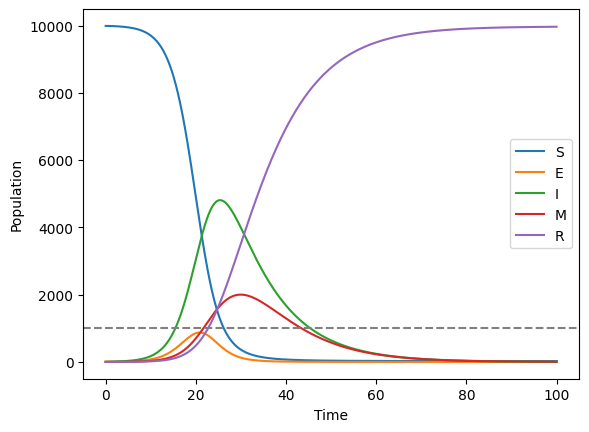

In [ ]:
from ctypes import c_int32
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

t=np.linspace(0,100,1000) #this sets up the time values for the simulation
sv = [9990,10,0,0,0]
c_3 = 3
beta_3 = 0.2
alpha_3 = 1
gamma_3 = 0.1
w_3 = 0.2
sol3=odeint(covid_model, sv, t, args=(c_3,beta_3,alpha_3,gamma_3,w_3)) #simulates the model

#plot simulation
plt.plot(t,sol3[:,0],label="S") #
plt.plot(t,sol3[:,1],label="E") #
plt.plot(t,sol3[:,2],label="I") #
plt.plot(t,sol3[:,3],label="M") #
plt.plot(t,sol3[:,4],label="R") #
plt.axhline(y=1000,color="gray",linestyle="--")
plt.legend(loc='best') #prepare the legend
plt.xlabel('Time') #set an x label
plt.ylabel('Population') #set a y label
plt.show() #show the plot

<font color='green'><u><b> Exercise 11.</b></u> </font> Describe the results of the model. Assume hospital bed capacity is 1000 (this corresponds to the horizontal dashed line on the graph). Appoximately at what time will hospitals be at capacity?

In [ ]:
#describe outcome

During the pandemic there was discussion over whether or not social distancing could have a significant effect on preventing hospitals from getting overwhelmed. We can answer this question with our model!

<font color='green'><u><b> Exercise 12.</b></u> </font> If you increase social distancing, is it possible to prevent hospitals from going over capacity? Remember that c is the social distancing parameter, the **smaller it is, the more social distancing is present**. Modify this parameter using the slider and answer the questions below this piece of code.

In [1]:
#using ipywidgets
%reload_ext autoreload
%autoreload 2

from scipy.integrate import odeint
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


t=np.linspace(0,200,1000) #this sets up the time values for the simulation
sv = [9990,10,0,0,0]
#init_c = 3
beta = 0.2
alpha = 1
gamma = 0.1
w = 0.2

def covid_model(state_vector, t, c, a):
  '''
  Defines a model for COVID, including the state variables S,E,I,M and R with parameters c, beta, alpha, gamma, and w where:
  S is the susceptible population
  E is the population of people who have been exposed (infected but not infectious)
  I is the population of people who are both infected and infectious
  M is the population of people who are medically symptomatic
  R is the population of people who are recovered

  c is the encounter rate
  beta is transmission probability per encounter
  alpha is rate at which infected become infectious
  gamma is rate at which infected become symptomatic
  w is 1/recovery time from being symptomatic
  '''
  S,E,I,M,R = state_vector #state variables as explained above
  Sprime= -c*beta*(I/(S+E+I+M+R))*S
  Eprime= c*beta*(I/(S+E+I+M+R))*S - alpha*E
  Iprime= alpha*E - gamma*I
  Mprime= gamma*I - w*M
  Rprime= w*M
  return[Sprime, Eprime, Iprime, Mprime, Rprime]

def f(c):
  '''
  makes an interacive for a covid SIR model
  '''
  sol3=odeint(covid_model, sv, t, args=(c, 0)) #simulates the model
  fig,ax = plt.subplots()
  line, = ax.plot(t,sol3[:,0],label="S") #
  line, = ax.plot(t,sol3[:,1],label="E") #
  line, = ax.plot(t,sol3[:,2],label="I") #
  line, = ax.plot(t,sol3[:,3],label="M") #
  line, = ax.plot(t,sol3[:,4],label="R") #

  ax.legend(loc='best') #prepare the legend
  ax.set_xlabel('Time') #set an x label
  ax.set_ylabel('Population') #set a y label

  plt.show()

interact(f, c=(0,3,0.5))

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0, step=0.5), Output()), _dom_classes=('wi…

<function __main__.f(c)>

<font color='green'><u><b> Exercise 13.</b></u> </font> How does changing the value of $c$ influence the timing, intensity, and duration of the outbreak? What might you reccomend for an acceptable value of $c$ if you were working in public health, based on these simulations? Why?

In [ ]:
#describe your results!

#DEV BIN

In [ ]:
#OLD, NONINTERACT VERSION
from ctypes import c_int32
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

t=np.linspace(0,100,1000) #this sets up the time values for the simulation
sv = [9990,10,0,0,0]
c_3 = 3 #change this value!
beta_3 = 0.2
alpha_3 = 1
gamma_3 = 0.1
w_3 = 0.2
sol3=odeint(covid_model, sv, t, args=(c_3,beta_3,alpha_3,gamma_3,w_3)) #simulates the model

#plot simulation
plt.plot(t,sol3[:,0],label="S") #
plt.plot(t,sol3[:,1],label="E") #
plt.plot(t,sol3[:,2],label="I") #
plt.plot(t,sol3[:,3],label="M") #
plt.plot(t,sol3[:,4],label="R") #
plt.legend(loc='best') #prepare the legend
plt.xlabel('Time') #set an x label
plt.ylabel('Population') #set a y label
plt.show() #show the plot

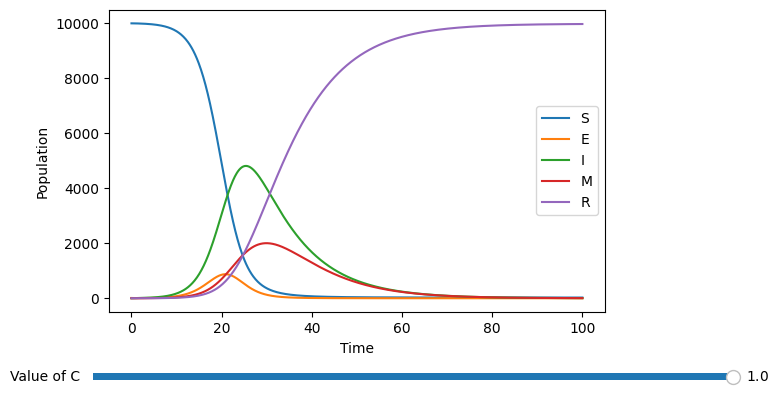

In [ ]:
%reload_ext autoreload
%autoreload 2

from scipy.integrate import odeint
from ctypes import c_int32
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

t=np.linspace(0,100,1000) #this sets up the time values for the simulation
sv = [9990,10,0,0,0]
init_c = 3
beta = 0.2
alpha = 1
gamma = 0.1
w = 0.2

def covid_model(state_vector, t, c, a):
  '''
  Defines a model for COVID, including the state variables S,E,I,M and R with parameters c, beta, alpha, gamma, and w where:
  S is the susceptible population
  E is the population of people who have been exposed (infected but not infectious)
  I is the population of people who are both infected and infectious
  M is the population of people who are medically symptomatic
  R is the population of people who are recovered

  c is the encounter rate
  beta is transmission probability per encounter
  alpha is rate at which infected become infectious
  gamma is rate at which infected become symptomatic
  w is 1/recovery time from being symptomatic
  '''
  S,E,I,M,R = state_vector #state variables as explained above
  Sprime= -c*beta*(I/(S+E+I+M+R))*S
  Eprime= c*beta*(I/(S+E+I+M+R))*S - alpha*E
  Iprime= alpha*E - gamma*I
  Mprime= gamma*I - w*M
  Rprime= w*M
  return[Sprime, Eprime, Iprime, Mprime, Rprime]

sol3=odeint(covid_model, sv, t, args=(init_c, 0)) #simulates the model

#plotting the figure
fig,ax = plt.subplots()
line, = ax.plot(t,odeint(covid_model, sv, t, args=(init_c, 0))[:,0],label="S") #
line, = ax.plot(t,odeint(covid_model, sv, t, args=(init_c, 0))[:,1],label="E") #
line, = ax.plot(t,odeint(covid_model, sv, t, args=(init_c, 0))[:,2],label="I") #
line, = ax.plot(t,odeint(covid_model, sv, t, args=(init_c, 0))[:,3],label="M") #
line, = ax.plot(t,odeint(covid_model, sv, t, args=(init_c, 0))[:,4],label="R") #

fig.subplots_adjust(bottom = 0.25)
ax_c = fig.add_axes([0.1, 0.1, 1, 0.03]) #x coord, y coord, length, width
c_slider = Slider(ax=ax_c, label ="Value of C", valmin= 0.1, valmax = 1, valinit=init_c, orientation="horizontal")

ax.legend(loc='best') #prepare the legend
ax.set_xlabel('Time') #set an x label
ax.set_ylabel('Population') #set a y label

def update(val):
  line.set_yadata(odeint(covid_model, sv, t, args=(c_slider.val, 0)))
  fig.canvas.draw_idle()
c_slider.on_changed(update)

plt.show()